In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.ticker as ticker

/Users/yifeishi/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
file_path = 'car_prices.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Data preprocessing

### 重新命名 column

In [4]:
df.rename(columns={'make': 'brand', 'body': 'body_type', 'odometer': 'mileage'}, inplace=True)

### 刪掉空白數據

In [5]:
df.dropna(inplace=True)

### 刪掉沒意義的vinn column

In [6]:
df.drop(columns=['vin'], inplace=True)

### Add a column 車輛賣出時年紀

In [7]:
df['sale_year'] = df['saledate'].str[11:15]
df['sale_year'] = pd.to_numeric(df['sale_year'], errors='coerce').astype('Int64')

In [8]:
df.head()

,year,brand,model,trim,body_type,transmission,state,condition,mileage,color,interior,seller,mmr,sellingprice,saledate,sale_year
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2015
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2014


In [9]:
df.shape

(472325, 16)

### 先把極端值以及不合理的數據都排除掉

/Users/yifeishi/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


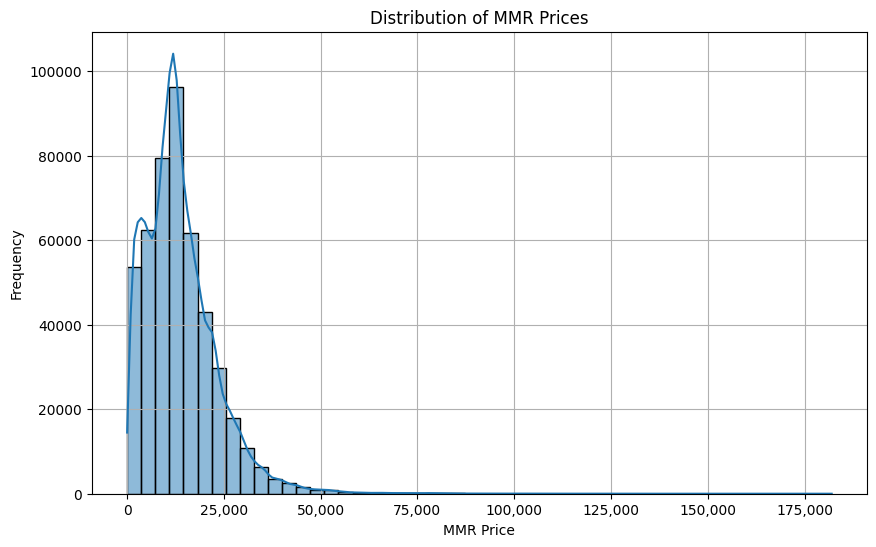

In [10]:
mmr_column = 'mmr'

plt.figure(figsize=(10, 6))
sns.histplot(df[mmr_column].dropna(), bins=50, kde=True)
plt.xlabel("MMR Price")
plt.ylabel("Frequency")
plt.title("Distribution of MMR Prices")
plt.grid(True)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [11]:
mmr_column = 'mmr'

low_threshold = df[mmr_column].quantile(0.02)
high_threshold = df[mmr_column].quantile(0.98)

print(f"MMR lowwer {low_threshold:,.0f}")
print(f"MMR higher {high_threshold:,.0f}")

MMR lowwer 1,125
MMR higher 38,100


In [12]:
df['sale_year'].value_counts()

sale_year
2015    435536
2014     36789
Name: count, dtype: Int64

    Since all sales are between 2014 & 2015, no need to adjust for inflation, can compare mmr & selling price at the same dollar value.

In [13]:
df = df[(df['mmr'] > 500) & (df['mmr'] < 45000)] 

df.shape

(466319, 16)

/Users/yifeishi/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


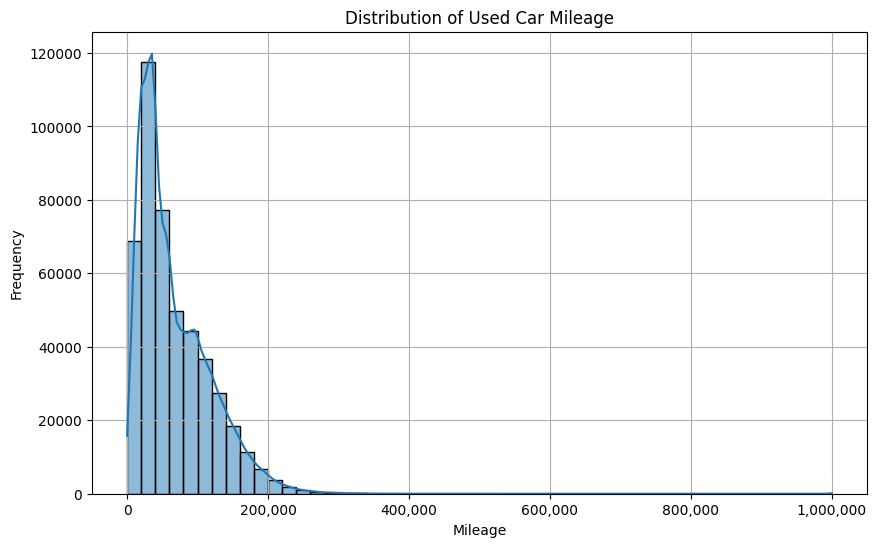

In [14]:
mileage_column = 'mileage'

plt.figure(figsize=(10, 6))
sns.histplot(df[mileage_column].dropna(), bins=50, kde=True)
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.title("Distribution of Used Car Mileage")
plt.grid(True)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [15]:
mileage_column = 'mileage'

low_threshold = df[mileage_column].quantile(0.02)
high_threshold = df[mileage_column].quantile(0.98)

print(f"mileage lowwer {low_threshold:,.0f}")
print(f"mileage higher {high_threshold:,.0f}")

mileage lowwer 6,147
mileage higher 194,577


In [16]:
df['mileage'].describe()

count    466319.000000
mean      66647.037547
std       50968.392201
min           1.000000
25%       28502.000000
50%       51462.000000
75%       96595.000000
max      999999.000000
Name: mileage, dtype: float64

In [17]:
df.shape

(466319, 16)

In [18]:
new_df = df[(df['mileage'] > 5000) & (df['mileage'] < 200000)] 

new_df.shape

(451465, 16)

    Almost 16000 records got deleted, some of them may be valid.

In [19]:
test_df = df[df['mileage'] > 200000] 
test_df['mileage'].describe()

count      7838.000000
mean     237131.819597
std       69747.725806
min      200001.000000
25%      208959.000000
50%      221933.000000
75%      244502.000000
max      999999.000000
Name: mileage, dtype: float64

    For subset having mileage greater than 200000, its 75th quartile is still under 250000, would it be better to increase the threshold for upper bound?

In [20]:
test_df = df[df['mileage'] < 5000] 
test_df['mileage'].describe()

count    7012.000000
mean     2426.457787
std      1692.835742
min         1.000000
25%       711.000000
50%      2661.000000
75%      3953.250000
max      4999.000000
Name: mileage, dtype: float64

    For subset having mileage less than 5000, its 25th quartile is still almost 1000, would it be better to decrease the threshold for lower bound?

/Users/yifeishi/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


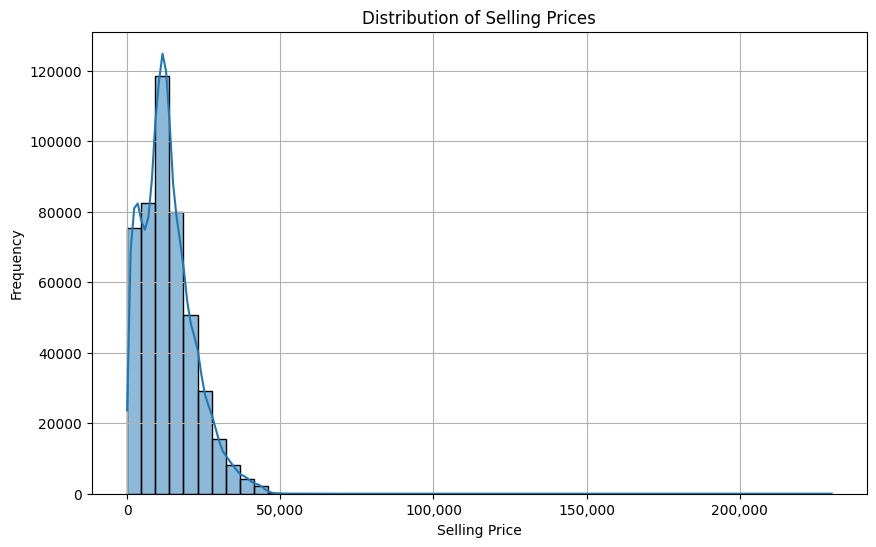

In [21]:
sellingprice_column = 'sellingprice'

plt.figure(figsize=(10, 6))
sns.histplot(df[sellingprice_column].dropna(), bins=50, kde=True)
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.grid(True)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [22]:
price = 'sellingprice'

low_threshold = df[price].quantile(0.02)
high_threshold = df[price].quantile(0.98)

print(f"price lowwer {low_threshold:,.0f}")
print(f"price higher {high_threshold:,.0f}")

price lowwer 900
price higher 35,000


In [23]:
df = df[(df['sellingprice'] > 1000) & (df['sellingprice'] < 45000)]

df.shape

(454009, 16)

### sale date 不會先於生產年份 (year column)

In [24]:
df = df[df['year'] <= df['sale_year']]

df.shape

(453868, 16)

    I changed it to year <= sale_year since a car can be produced and sold at the same year.

### 新增賣出時車輛年紀

In [25]:
# 相減後加1（包括起始年和結束年） 
df['car_age'] = df['sale_year'] - df['year']

    need to output a csv file here as the outcome of data preprocessing module

In [26]:
# output df_cleaned to a csv file named 'car_prices_cleaned.csv'
# df_cleaned.to_csv('car_prices_cleaned.csv', index=False)

## Decpreciation Analysis

    Baseline Model: Assume there is a linear relationship between vehicle's mileage and its depreciation, we can assume depreciation can be calculated by adding a constant parameter k:
**depreciation = k \* mileage**

    need to read the preprocessed file after splitting notebook for different modules

In [27]:
# df_cleaned = pd.read_csv('car_prices_cleaned.csv')

In [28]:
df_depr = df.copy()

In [29]:
df_depr.head()

,year,brand,model,trim,body_type,transmission,state,condition,mileage,color,interior,seller,mmr,sellingprice,saledate,sale_year,car_age
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015,1
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2015,0
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST),2014,0
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),2014,0
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST),2015,1


To explore how other factors affect depreciation, we can use 'mileage' as an indicator of depreciation ratio in the baseline model.

### feature engineering

We need to explore what features relevant in impacting the calculation of depreciation rate per mileage.

In [30]:
# selecting relevant features based on empirical knowledge
relevant_features = ['brand', 'body_type', 'car_age', 'condition', 'transmission', 'mileage']
df_depr = df_depr[relevant_features]
df_depr.head()

,brand,body_type,car_age,condition,transmission,mileage
2,BMW,Sedan,1,45.0,automatic,1331.0
3,Volvo,Sedan,0,41.0,automatic,14282.0
7,Chevrolet,Sedan,0,2.0,automatic,28617.0
8,Audi,Sedan,0,42.0,automatic,9557.0
9,Chevrolet,Convertible,1,3.0,automatic,4809.0


In [31]:
df_depr['brand'].value_counts().shape

(47,)

In [32]:
df_depr['body_type'].value_counts().shape

(82,)

Both 'brand' and 'body_type' are high dimensional categorical variables --> use label encoding to convert them to numeric values

In [33]:
df_depr['transmission'].value_counts().shape

(2,)

only two types of transmission, convert it to boolean value

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
# label encoding for categorical features
le = LabelEncoder()
df_depr['brand'] = le.fit_transform(df_depr['brand'])
df_depr['body_type'] = le.fit_transform(df_depr['body_type'])
df_depr['transmission'] = le.fit_transform(df_depr['transmission'])
df_depr.head()

,brand,body_type,car_age,condition,transmission,mileage
2,3,34,1,45.0,0,1331.0
3,45,34,0,41.0,0,14282.0
7,7,34,0,2.0,0,28617.0
8,2,34,0,42.0,0,9557.0
9,7,8,1,3.0,0,4809.0


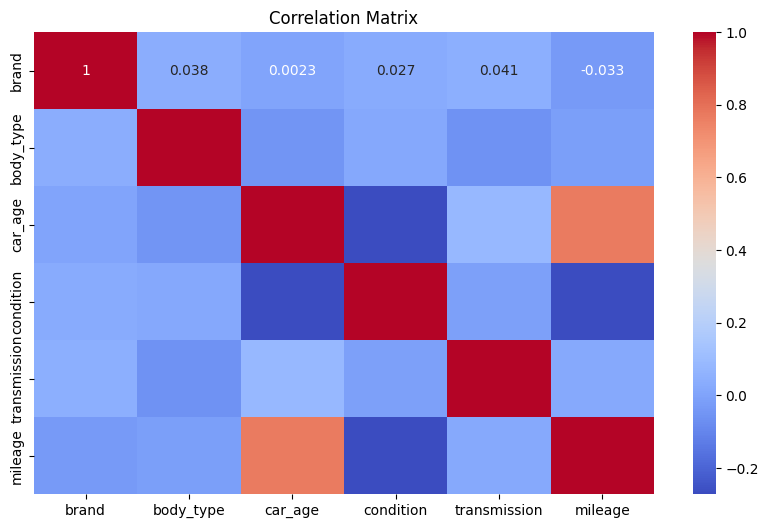

In [36]:
# conduct correlation analysis to remove multicollinearity
corr_matrix = df_depr.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Very low correlation between each explanatory features, can proceed to train model

In [37]:
# standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_depr[['car_age', 'condition', 'brand', 'body_type', 'transmission', 'mileage']] = scaler.fit_transform(df_depr[['car_age', 'condition', 'brand', 'body_type', 'transmission', 'mileage']])
df_depr.head()

,brand,body_type,car_age,condition,transmission,mileage
2,-1.262371,-0.188425,-0.994512,1.061583,-0.186013,-1.298652
3,2.066911,-0.188425,-1.280338,0.752880,-0.186013,-1.032008
7,-0.945296,-0.188425,-1.280338,-2.256971,-0.186013,-0.736870
8,-1.341640,-0.188425,-1.280338,0.830056,-0.186013,-1.129289
9,-0.945296,-1.712004,-0.994512,-2.179795,-0.186013,-1.227044


### Model training

I choose decision tree model as a baseline model given the presumption that the depreciation rate is primarily driven by mileage, and I want to explore how other relevant features can impact the depreciation rate

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X, y = df_depr.drop(columns=['mileage']), df_depr['mileage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# make sure training data & test data have the same number of features and acceptable number of samples
print(X_train.shape)
print(X_test.shape)

(363094, 5)
(90774, 5)


In [41]:
from sklearn.tree._classes import DecisionTreeRegressor

In [42]:
# train a decision tree model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [43]:
# make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

**success metrics**: use RMSE to measure the error of predictions on both training & test data

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Model Training RMSE: {train_rmse:.2f}")
print(f"Model Test RMSE: {test_rmse:.2f}")

Model Training RMSE: 0.48
Model Test RMSE: 0.64


In [45]:
# print the coefficient of the decision tree model 
for feature, importance in zip(X.columns, dt.feature_importances_):
    print(f"{feature}: {importance:.2f}")

brand: 0.06
body_type: 0.05
car_age: 0.81
condition: 0.07
transmission: 0.01


Results not good, try more complex model.

#### Random forest

In [46]:
# use random forest regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
# make predictions
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

In [48]:
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Model Training RMSE: {train_rmse:.2f}")
print(f"Model Test RMSE: {test_rmse:.2f}")

Model Training RMSE: 0.49
Model Test RMSE: 0.61


In [49]:
# print the coefficient of the decision tree model 
for feature, importance in zip(X.columns, rfr.feature_importances_):
    print(f"{feature}: {importance:.2f}")

brand: 0.06
body_type: 0.06
car_age: 0.79
condition: 0.08
transmission: 0.01


#### XGBoost

In [50]:
# use xgboost to train a regression model
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
# make predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

In [52]:
# calculate r squared score of the model
train_r2 = xgb.score(X_train, y_train)
test_r2 = xgb.score(X_test, y_test)
print(f"Model Training R^2: {train_r2:.2f}")
print(f"Model Test R^2: {test_r2:.2f}")

Model Training R^2: 0.69
Model Test R^2: 0.68


In [53]:
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Model Training RMSE: {train_rmse:.2f}")
print(f"Model Test RMSE: {test_rmse:.2f}")

Model Training RMSE: 0.56
Model Test RMSE: 0.57


In [54]:
# print the coefficient of the xgboost model
for feature, importance in zip(X.columns, xgb.feature_importances_):
    print(f"{feature}: {importance:.2f}")

brand: 0.03
body_type: 0.03
car_age: 0.89
condition: 0.03
transmission: 0.01


After training with different non-linear tree models, xgboost outperforms other models by yielding a r^2 score of **0.68** on the test result and the smallest rmse on test data. This model shows that the top dominant features affecting mileage are **car age**. However, the depreciation curve of different brands can largely impact the results.

## Segment Analysis

    Even though car age is the dominant feature in affecting depreciation, we should advance our baseline model to discern depreciation pattens across different brands by market segmentation. Here we will map models in each brand to different levels of comfort, and see whether it will affect the resale prices.

    need to read the preprocessed file after splitting notebook for different modules

In [55]:
# read the car_prices.csv file
# file_path = 'car_prices.csv'
# df = pd.read_csv(file_path)

### 找前10成交數量品牌

In [56]:
print("\nUnique Brand:", df['brand'].nunique())


Unique Brand: 47


In [57]:
# Find the top 10 best-selling brands
top_10_brands = df['brand'].value_counts().nlargest(10).index
top_10_brands


Index(['Ford', 'Chevrolet', 'Nissan', 'Toyota', 'Dodge', 'Honda', 'Hyundai',
       'BMW', 'Kia', 'Chrysler'],
      dtype='object', name='brand')

In [58]:
# Find the top 20 best-selling brands
top_20_brands = df['brand'].value_counts().nlargest(20).index
top_20_brands


Index(['Ford', 'Chevrolet', 'Nissan', 'Toyota', 'Dodge', 'Honda', 'Hyundai',
       'BMW', 'Kia', 'Chrysler', 'Infiniti', 'Mercedes-Benz', 'Jeep',
       'Volkswagen', 'Lexus', 'GMC', 'Mazda', 'Cadillac', 'Lincoln', 'Audi'],
      dtype='object', name='brand')

In [59]:
df = df[df['brand'].isin(top_10_brands)]

### 確認有成功

In [60]:
print("\nUnique Brands:", df['brand'].nunique())
print("\nUnique models:", df['model'].nunique())


Unique Brands: 10

Unique models: 278


## market category mapping preparation

### 把目前所有brand and model 列出來 group by brand

In [61]:
unique_models_list = df.groupby("brand")["model"].unique().reset_index()

unique_models_list.columns = ["brand", "unique_models"]

unique_models_dict = unique_models_list.set_index("brand")["unique_models"].to_dict()

unique_models_dict

{'BMW': array(['3 Series', '5 Series', 'X1', '4 Series', '6 Series', '7 Series',
        '1 Series', 'M3', 'X3', 'X5', 'Z4', 'X6', '5 Series Gran Turismo',
        'M5', 'Z3', 'M', 'ActiveHybrid X6', 'X6 M', 'M6', '2 Series',
        '3 Series Gran Turismo', 'ActiveHybrid 7', 'Z4 M', 'X5 M',
        'ActiveHybrid 5', '8 Series', '6 Series Gran Coupe',
        '4 Series Gran Coupe'], dtype=object),
 'Chevrolet': array(['Cruze', 'Camaro', 'Impala', 'Malibu', 'Silverado 1500',
        'Traverse', 'Silverado 2500HD', 'Equinox', 'Captiva Sport', 'Volt',
        'Express Cargo', 'Colorado', 'Express', 'Sonic', 'Suburban', 'HHR',
        'Tahoe', 'Impala Limited', 'Aveo', 'Corvette', 'malibu',
        'Avalanche', 'Tahoe Hybrid', 'Malibu Classic', 'Cobalt',
        'Uplander', 'Silverado 1500 Classic', 'Monte Carlo', 'TrailBlazer',
        'Malibu Maxx', 'S-10', 'Silverado 1500HD', 'Spark', 'SSR',
        'Silverado 3500HD', 'Silverado 1500 Hybrid',
        'Silverado 2500HD Classic', 'Silver

### Add in new column market_category

### making a market category map defining which models are what market category

In [62]:
market_category_map = {
    "Economy Sedan": [
        "Altima", "Focus", "Impala", "Sonata", "Cruze", "Taurus",
        "Optima", "200", "Avenger", "Passat", "Civic", "Corolla",
        "Fusion", "Malibu", "Sentra", "Elantra", "Jetta", "Accord",
        "Camry", "Versa", "Rio", "Yaris"    ],
    "Luxury Sedan": [
        "3 Series", "5 Series", "7 Series", "A4", "A6", "A8", "C-Class", 
        "E-Class", "S-Class", "S60", "S90", "TLX", "Q50", "Genesis",
        "Maxima", "300", "G Sedan", "LS", "ES", "IS"    ],
    "Sports Sedan": [
        "M3", "M5", "Charger", "S4", "CTS-V", "IS F", "XFR", "WRX"    ],
    "Economy SUV": [
        "Explorer", "Edge", "Journey", "Escape", "Rogue", "Tucson",
        "Equinox", "Sorento", "CX-5", "CR-V", "RAV4", "Highlander",
        "Santa Fe", "Kicks", "HR-V", "Sportage"    ],
    "Luxury SUV": [
        "Grand Cherokee", "X5", "X3", "Q7", "Q5", "GLC", "GLA", 
        "RX", "LX", "Cayenne", "MDX", "Escalade", "Navigator",
        "GLE", "Macan", "XC90" ],
    "Off-Road SUV": [
        "Wrangler", "4Runner", "Bronco", "Defender", "G-Class"    ],
    "Pickup Truck": [
        "1500", "F-150", "Silverado 1500", "Ram Pickup 1500", 
        "Tacoma", "Tundra", "Ranger", "Colorado", "Frontier"    ],
    "Electric Vehicle": [
        "Leaf", "Model S", "Model 3", "Model X", "Model Y",
        "Bolt", "i3", "i4", "Polestar 2", "Mach-E"    ],
    "Sports Car": [
        "Mustang", "Camaro", "Corvette", "370Z", "911", "M4",
        "Supra", "GT-R", "F-Type", "718 Cayman"    ],
    "Minivan": [
        "Sienna", "Odyssey", "Grand Caravan", "Town and Country",
        "Quest", "Pacifica", "Sedona"    ],
    "Hybrid Car": [
        "Prius", "Camry Hybrid", "Accord Hybrid", "Fusion Hybrid",
        "Highlander Hybrid", "RAV4 Hybrid"    ]
}

def get_market_category(brand, model):
    model = str(model)  
    for category, models in market_category_map.items():
        if any(model.startswith(m) for m in models):
            return category
    return "Other"  

df["market_category"] = df.apply(lambda x: get_market_category(x["brand"], x["model"]), axis=1)


In [63]:
print("\nUnique Category:", df['market_category'].nunique())

# count other 的數量
other_count = df["market_category"].value_counts().get("Other", 0)

print(f'count other: {other_count}')


Unique Category: 12
count other: 65721


### 減少other 數量
### find out what brand and model the top 20 other belong to

In [64]:
other_models_count = (
    df[df["market_category"] == "Other"]
    .groupby(["brand", "model"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    .head(20)
)

other_models_count

,brand,model,count
51,Chevrolet,Tahoe,2529
140,Kia,Forte,2469
144,Kia,Soul,2437
150,Nissan,Murano,2431
106,Ford,Fiesta,2214
103,Ford,F-250 Super Duty,2113
101,Ford,Expedition,2103
50,Chevrolet,Suburban,1918
123,Honda,Pilot,1815
57,Chevrolet,Traverse,1777


In [65]:
# 更新market category

market_category_map = {
    "Economy Sedan": [
        "Altima", "Focus", "Impala", "Sonata", "Cruze", "Taurus",
        "Optima", "200", "Avenger", "Passat", "Civic", "Corolla",
        "Fusion", "Malibu", "Sentra", "Elantra", "Jetta", "Accord",
        "Camry", "Versa", "Rio", "Yaris", "Forte", "Fiesta", "Sonic", "Cobalt", "Sebring"],
    
    "Luxury Sedan": [
        "3 Series", "5 Series", "7 Series", "A4", "A6", "A8", "C-Class", 
        "E-Class", "S-Class", "S60", "S90", "TLX", "Q50", "Genesis",
        "Maxima", "300", "G Sedan", "LS", "ES", "IS"],
    
    "Sports Sedan": [
        "M3", "M5", "Charger", "S4", "CTS-V", "IS F", "XFR", "WRX"],
    
    "Economy SUV": [
        "Explorer", "Edge", "Journey", "Escape", "Rogue", "Tucson",
        "Equinox", "Sorento", "CX-5", "CR-V", "RAV4", "Highlander",
        "Santa Fe", "Kicks", "HR-V", "Sportage", "Soul", "Pilot", "Pathfinder", "Traverse", "Durango"],
    
    "Luxury SUV": [
        "Grand Cherokee", "X5", "X3", "Q7", "Q5", "GLC", "GLA", 
        "RX", "LX", "Cayenne", "MDX", "Escalade", "Navigator",
        "GLE", "Macan", "XC90", "Tahoe", "Suburban", "Murano", "Expedition"],
    
    "Off-Road SUV": [
        "Wrangler", "4Runner", "Bronco", "Defender", "G-Class"],
    
    "Pickup Truck": [
        "1500", "F-150", "Silverado 1500", "Ram Pickup 1500", 
        "Tacoma", "Tundra", "Ranger", "Colorado", "Frontier", "F-250 Super Duty", "Silverado 2500HD"],
    
    "Electric Vehicle": [
        "Leaf", "Model S", "Model 3", "Model X", "Model Y",
        "Bolt", "i3", "i4", "Polestar 2", "Mach-E"],
    
    "Sports Car": [
        "Mustang", "Camaro", "Corvette", "370Z", "911", "M4",
        "Supra", "GT-R", "F-Type", "718 Cayman"],
    
    "Minivan": [
        "Sienna", "Odyssey", "Grand Caravan", "Town and Country",
        "Quest", "Pacifica", "Sedona"],
    
    "Hybrid Car": [
        "Prius", "Camry Hybrid", "Accord Hybrid", "Fusion Hybrid",
        "Highlander Hybrid", "RAV4 Hybrid"],
    
    "Economy Hatchback": [
        "Caliber", "PT Cruiser", "Accent"],
}


def get_market_category(brand, model):
    model = str(model) 
    for category, models in market_category_map.items():
        if any(model.startswith(m) for m in models):
            return category
    return "Other"  

df["market_category"] = df.apply(lambda x: get_market_category(x["brand"], x["model"]), axis=1)


In [66]:
print("\nUnique Category:", df['market_category'].nunique())

# count other 的數量
other_count = df["market_category"].value_counts().get("Other", 0)

print(f'count other: {other_count}')


Unique Category: 13
count other: 31458


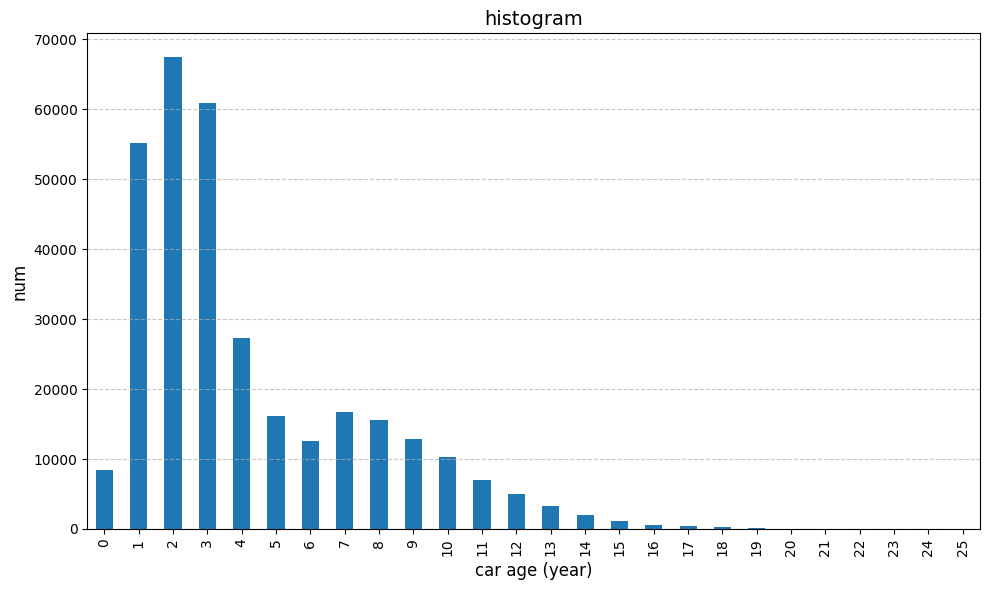

In [67]:
plt.figure(figsize=(10, 6))
df['car_age'].value_counts().sort_index().plot(kind='bar')

plt.title('histogram', fontsize=14)
plt.xlabel('car age (year)', fontsize=12)
plt.ylabel('num', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

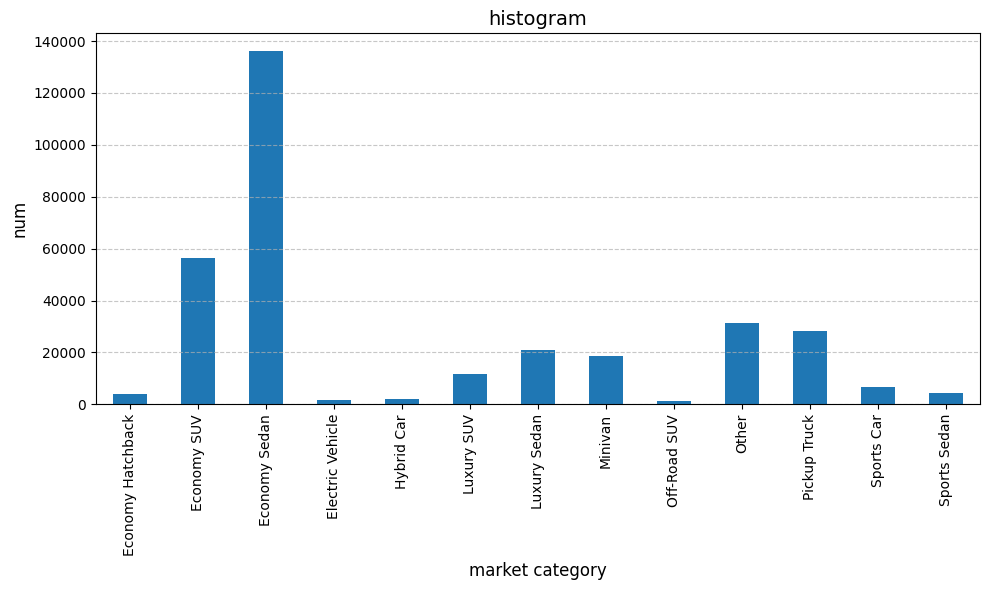

In [68]:
plt.figure(figsize=(10, 6))
df['market_category'].value_counts().sort_index().plot(kind='bar')

plt.title('histogram', fontsize=14)
plt.xlabel('market category', fontsize=12)
plt.ylabel('num', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [69]:
# output_file_path = r"C:\Users\jenna\OneDrive\桌面\unique_models_per_make.csv"
# df.to_csv(output_file_path, index=False)

## 找出對價錢影像最大的feature

In [70]:
!pip install category-encoders

In [71]:
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder

# 定義特徵類別
num_features = ['condition', 'mileage', 'car_age']
low_card_cat_features = ['transmission', 'color', 'interior']
high_card_cat_features = ['brand', 'trim', 'state', 'market_category']
target = 'sellingprice'

# 分割數據集
train, test = train_test_split(df, test_size=0.2, random_state=42)

# One-Hot Encoding for low-cardinality categorical features
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
train_ohe = ohe.fit_transform(train[low_card_cat_features])
test_ohe = ohe.transform(test[low_card_cat_features])

# Target Encoding for high-cardinality categorical features
te = TargetEncoder()
train_te = te.fit_transform(train[high_card_cat_features], train[target])
test_te = te.transform(test[high_card_cat_features])

# 合併處理後特徵
X_train = np.hstack((train[num_features].values, train_ohe, train_te))
X_test = np.hstack((test[num_features].values, test_ohe, test_te))

y_train = train[target].values
y_test = test[target].values

# 確保特徵處理後維度合理
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (258676, 43)
Test Shape: (64670, 43)


## random forest

### why 用random not lienar 因為 
1. mileage, condition, car_age不是線性關係
2. linear 不能處理category data type
3. 線性回歸係數表示的是影響方向   不代表重要性

In [72]:
from sklearn.ensemble import RandomForestRegressor

# 訓練 Random Forest 
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# 獲取特徵重要性
feature_importance = rf.feature_importances_

# 合併特徵name
feature_names = num_features + list(ohe.get_feature_names_out(low_card_cat_features)) + high_card_cat_features

# 轉換為 df
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

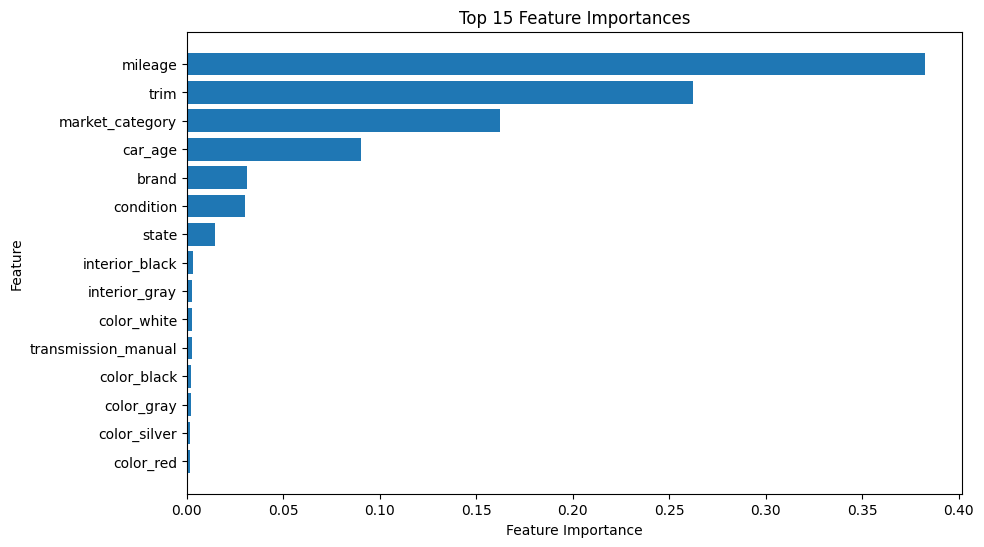

In [73]:
#feature importance 代表該特徵在分裂決策樹時，被用來 降低預測誤差的貢獻程度

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:15], importance_df['Importance'][:15])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

    Based on the plot of feature importance, we can see that other than mileage, market_category also plays a major role in affecting the resale price.

#  探索因果關係 feature 跟 價千關係

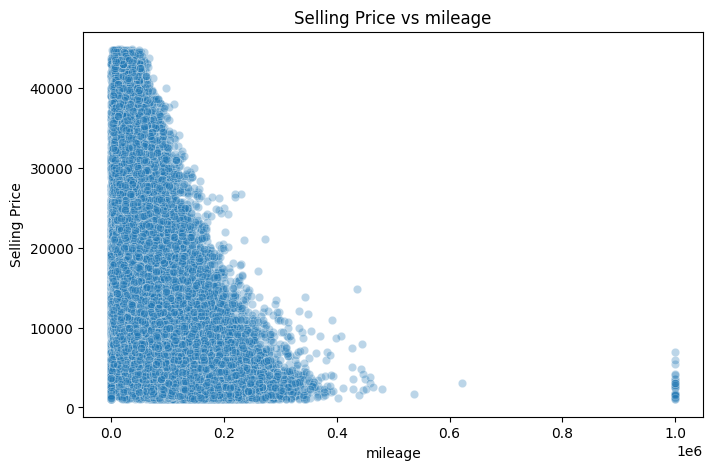

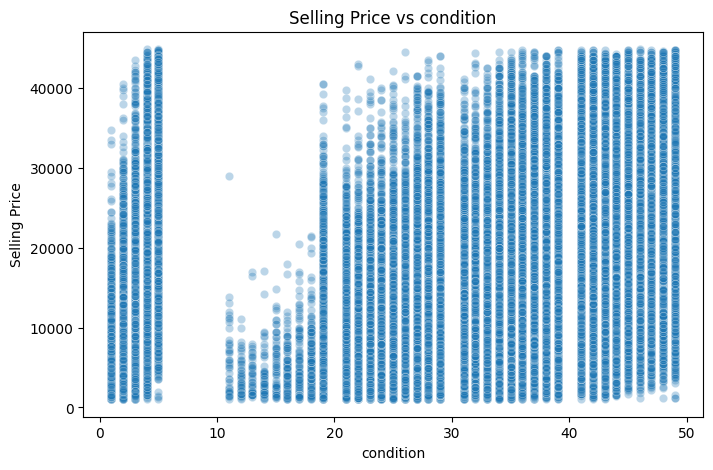

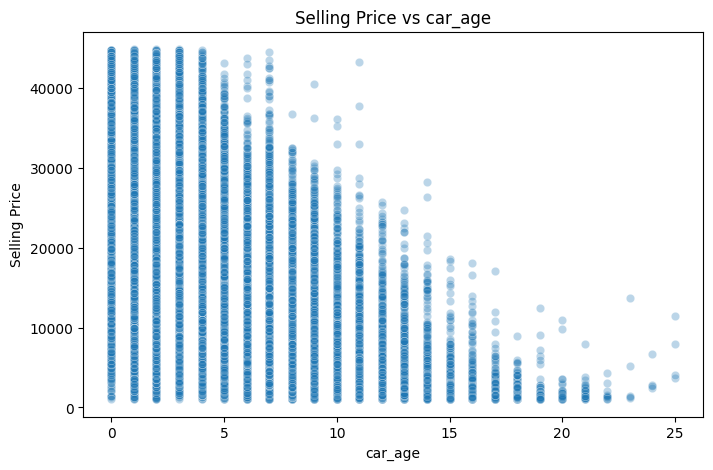

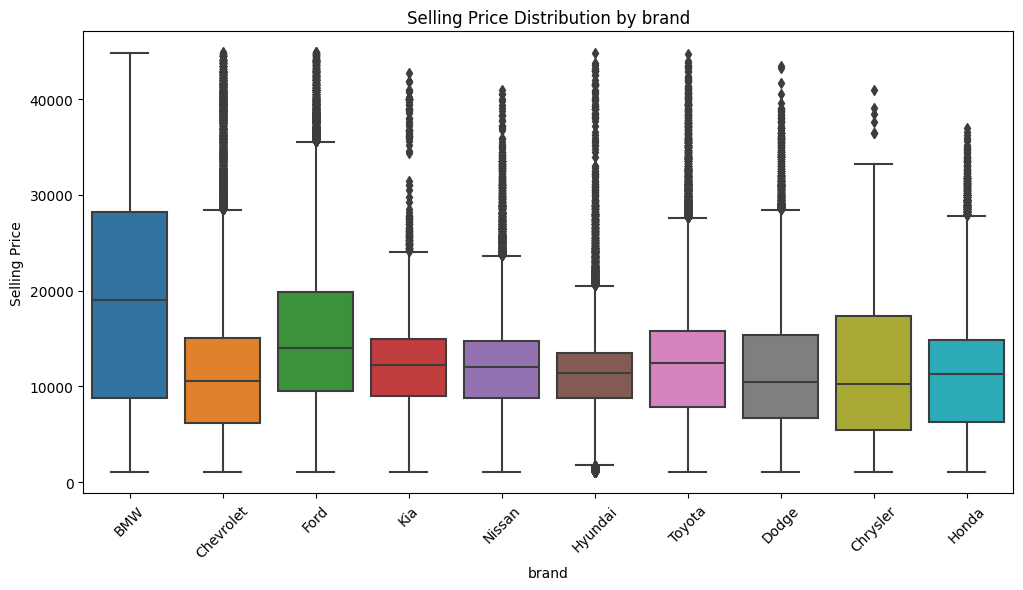

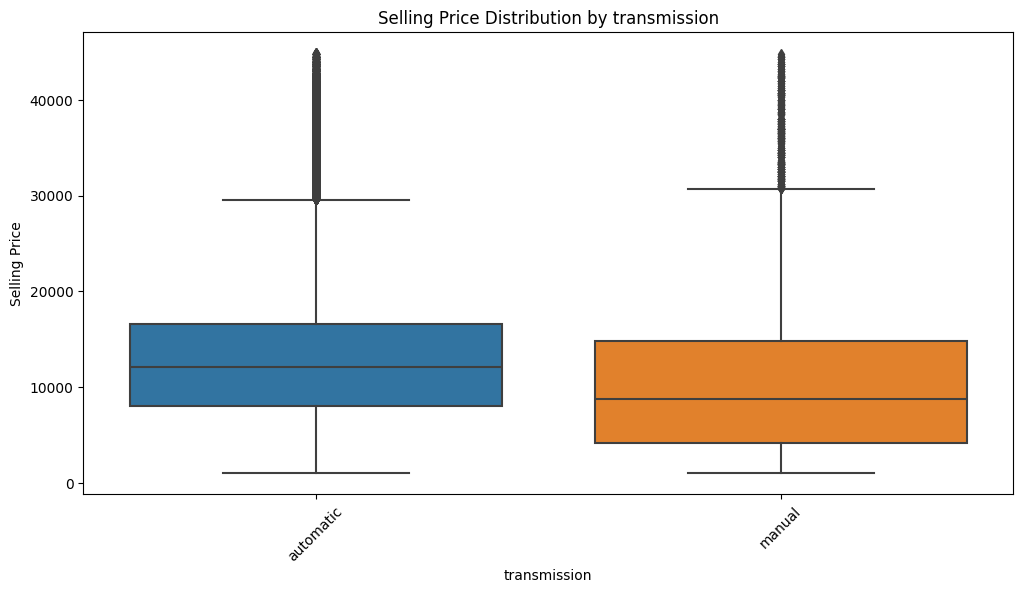

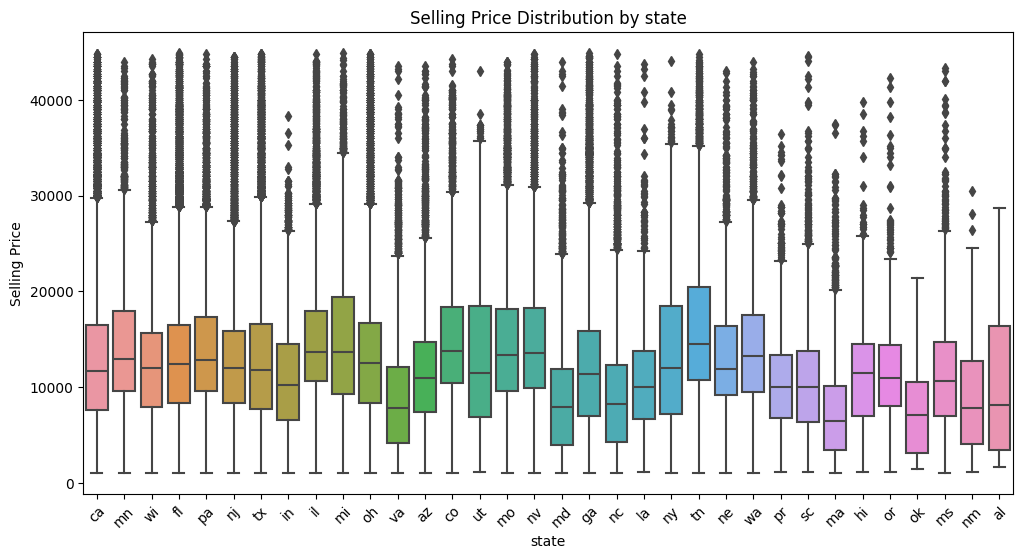

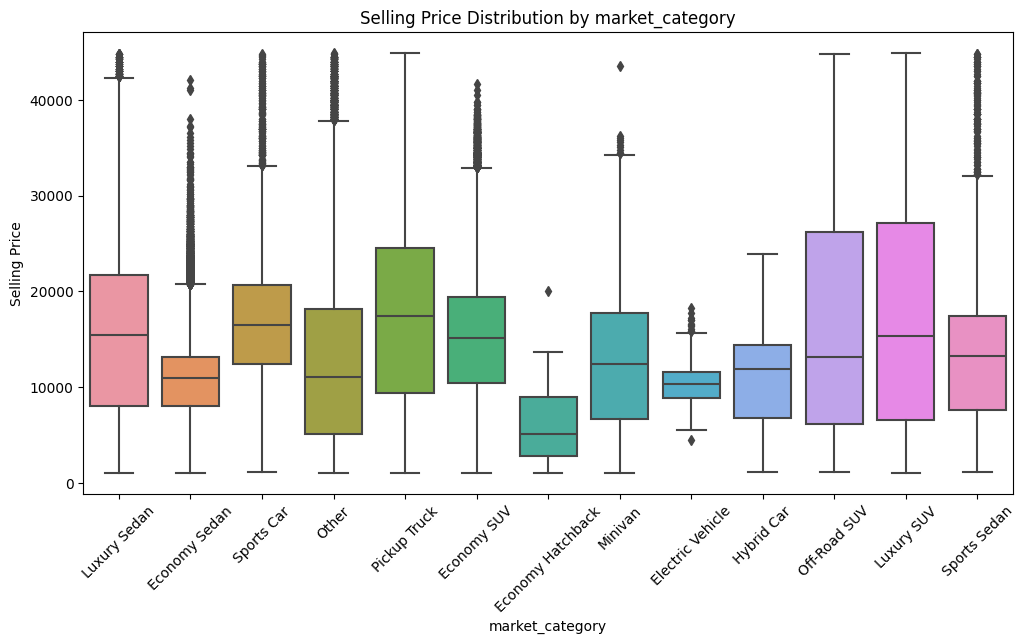

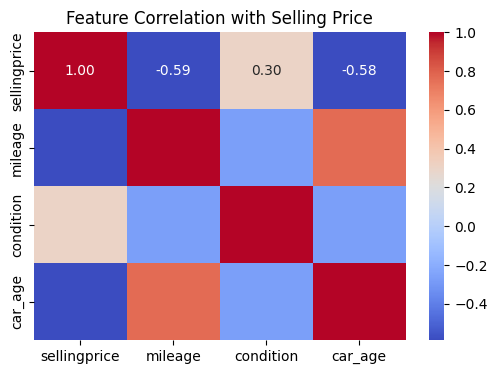

In [74]:
# 散點圖：看number變數與 selling_price 的關係
num_features = ['mileage', 'condition', 'car_age']
for feature in num_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df['sellingprice'], alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel("Selling Price")
    plt.title(f"Selling Price vs {feature}")
    plt.show()

# box plt category變數對 sprice 的影響
cat_features = ['brand', 'transmission', 'state', 'market_category']
for feature in cat_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[feature], y=df['sellingprice'])
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel("Selling Price")
    plt.title(f"Selling Price Distribution by {feature}")
    plt.show()

# 計算correlation coefficient
corr_matrix = df[['sellingprice', 'mileage', 'condition', 'car_age']].corr()

# correlation coefficient Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Selling Price")
plt.show()

## 價格趨勢與車型推薦 

    need to work on this... because our proposal stated that foe the last module we want to define and calculate the value retention metric by comparing selling price to MMR, identifying models that retain value best over time

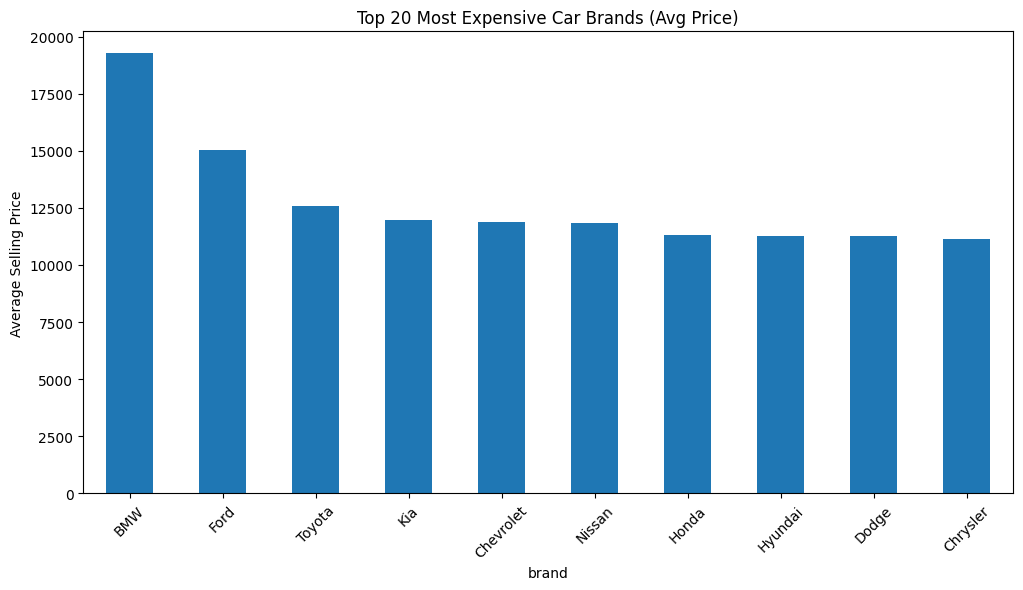

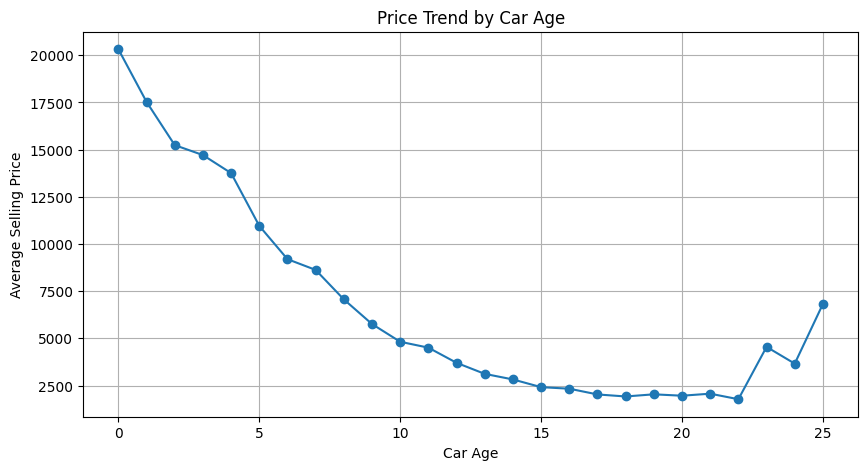

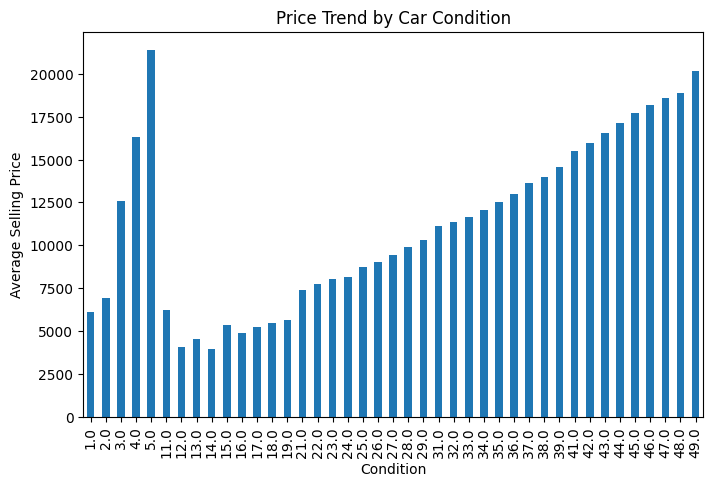

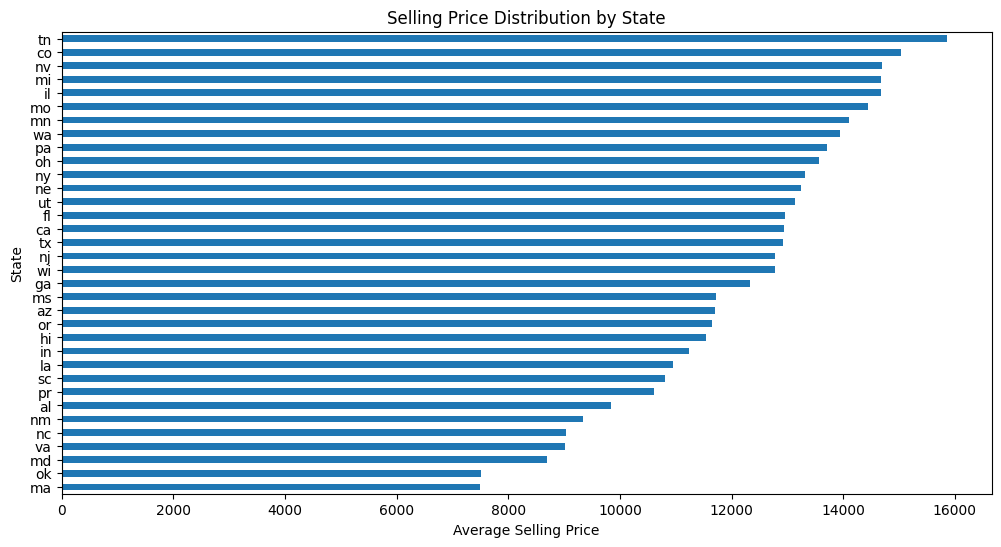

In [75]:
# 品牌均價分析
brand_avg_price = df.groupby('brand')['sellingprice'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
brand_avg_price[:20].plot(kind='bar')
plt.ylabel("Average Selling Price")
plt.title("Top 20 Most Expensive Car Brands (Avg Price)")
plt.xticks(rotation=45)
plt.show()

# 不同車齡的均價變化
car_age_price = df.groupby('car_age')['sellingprice'].mean()

plt.figure(figsize=(10, 5))
car_age_price.plot(marker='o')
plt.xlabel("Car Age")
plt.ylabel("Average Selling Price")
plt.title("Price Trend by Car Age")
plt.grid()
plt.show()

# 不同condition的均價
condition_price = df.groupby('condition')['sellingprice'].mean()

plt.figure(figsize=(8, 5))
condition_price.plot(kind='bar')
plt.xlabel("Condition")
plt.ylabel("Average Selling Price")
plt.title("Price Trend by Car Condition")
plt.show()

# state price difference
state_avg_price = df.groupby('state')['sellingprice'].mean().sort_values()

plt.figure(figsize=(12, 6))
state_avg_price.plot(kind='barh')
plt.xlabel("Average Selling Price")
plt.ylabel("State")
plt.title("Selling Price Distribution by State")
plt.show()


# Value Retention Module

In [6]:
#Step 1: Data Loading and Cleaning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print("Step 1: Data Loading and Cleaning")
file_path = '/Users/kat/Downloads/car_prices.csv'
print(f"Loading data from {file_path}...")
df = pd.read_csv(file_path)

column_mapping = {
    'make': 'brand',
    'body': 'body_type',
    'odometer': 'mileage'
}
for old_col, new_col in column_mapping.items():
    if old_col in df.columns:
        df.rename(columns={old_col: new_col}, inplace=True)

# Remove rows with missing values in key columns
df = df.dropna(subset=['sellingprice', 'mmr', 'mileage', 'year'])

# Extract sale year from the date string and convert to integer
df['sale_year'] = df['saledate'].str[11:15].astype(int)
# Calculate vehicle age (years between sale and manufacturing)
df['car_age'] = df['sale_year'] - df['year']

# Filter out outliers that could skew our analysis
df = df[(df['sellingprice'] > 1000) & (df['sellingprice'] < 100000)]
df = df[(df['mileage'] > 5000) & (df['mileage'] < 200000)]
df = df[df['car_age'] >= 0]  # Remove invalid ages

print(f"Number of records after cleaning: {len(df)}")

# Calculate value retention ratio (selling price / market value)
df['value_retention_ratio'] = (df['sellingprice'] / df['mmr']).round(4)

# Display a sample of the cleaned data
df[['year', 'sale_year', 'car_age', 'sellingprice', 'mmr', 'value_retention_ratio']].head()

Step 1: Data Loading and Cleaning
Loading data from /Users/kat/Downloads/car_prices.csv...
Number of records after cleaning: 524098


,year,sale_year,car_age,sellingprice,mmr,value_retention_ratio
3,2015,2015,0,27750.0,27500.0,1.0091
6,2014,2014,0,65000.0,69000.0,0.9420
7,2014,2014,0,9800.0,11900.0,0.8235
8,2014,2014,0,32250.0,32100.0,1.0047
10,2014,2014,0,49750.0,47300.0,1.0518


In [7]:
#Step 2: Creating Cohorts and Time Periods

print("\nStep 2: Creating Cohorts and Time Periods")

# Group vehicles by manufacturing year to create cohorts
df['cohort'] = df['year']
print(f"Created {df['cohort'].nunique()} cohorts based on manufacturing year")

# Check the distribution of vehicles across cohorts
cohort_counts = df['cohort'].value_counts().sort_index()
print("\nNumber of vehicles in each cohort:")
print(cohort_counts.head(10))  # Show the first 10 cohorts

# Examine the vehicle age distribution
print(f"\nVehicle age range: {df['car_age'].min()} to {df['car_age'].max()} years")
print("\nVehicle age distribution:")
print(df['car_age'].value_counts().sort_index().head(10))  # Show first 10 ages


Step 2: Creating Cohorts and Time Periods
Created 34 cohorts based on manufacturing year

Number of vehicles in each cohort:
1982     2
1983     1
1984     5
1985     9
1986     6
1987     3
1988     4
1989     5
1990    11
1991    17
Name: cohort, dtype: int64

Vehicle age range: 0 to 33 years

Vehicle age distribution:
0    12229
1    78217
2    98025
3    99519
4    45964
5    25713
6    21507
7    30944
8    29343
9    24597
Name: car_age, dtype: int64


In [8]:
# Step 3: Cohort Analysis Creation

# Step 3: Build the cohort analysis
print("\nStep 3: Building Cohort Analysis")

# Group data by cohort and vehicle age, then calculate average retention ratio
cohort_data = df.groupby(['cohort', 'car_age'])['value_retention_ratio'].agg(['mean', 'count']).reset_index()
print("Sample of cohort data:")
print(cohort_data.head())

# Create a pivot table for easier visualization and analysis
cohort_pivot = cohort_data.pivot_table(
    index='cohort',
    columns='car_age',
    values='mean'
)

print("\nValue retention ratio pivot table:")
print(cohort_pivot.head())

# Create a sample size pivot table to validate our insights
count_pivot = cohort_data.pivot_table(
    index='cohort',
    columns='car_age',
    values='count'
)

print("\nSample sizes for each cohort-age combination:")
print(count_pivot.head())


Step 3: Building Cohort Analysis
Sample of cohort data:
   cohort  car_age      mean  count
0    1982       33  3.193950      2
1    1983       32  0.867800      1
2    1984       31  1.099120      5
3    1985       29  1.795500      2
4    1985       30  1.096786      7

Value retention ratio pivot table:
car_age  0   1   2   3   4   5   6   7   8   9   ...  24  25  26  27      28  \
cohort                                           ...                           
1982    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN     NaN   
1983    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN     NaN   
1984    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN     NaN   
1985    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN     NaN   
1986    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN  0.8615   

car_age       29        30       31      32       33  
cohort                                                
1982         NaN    


Step 4: Visualizing Retention Patterns


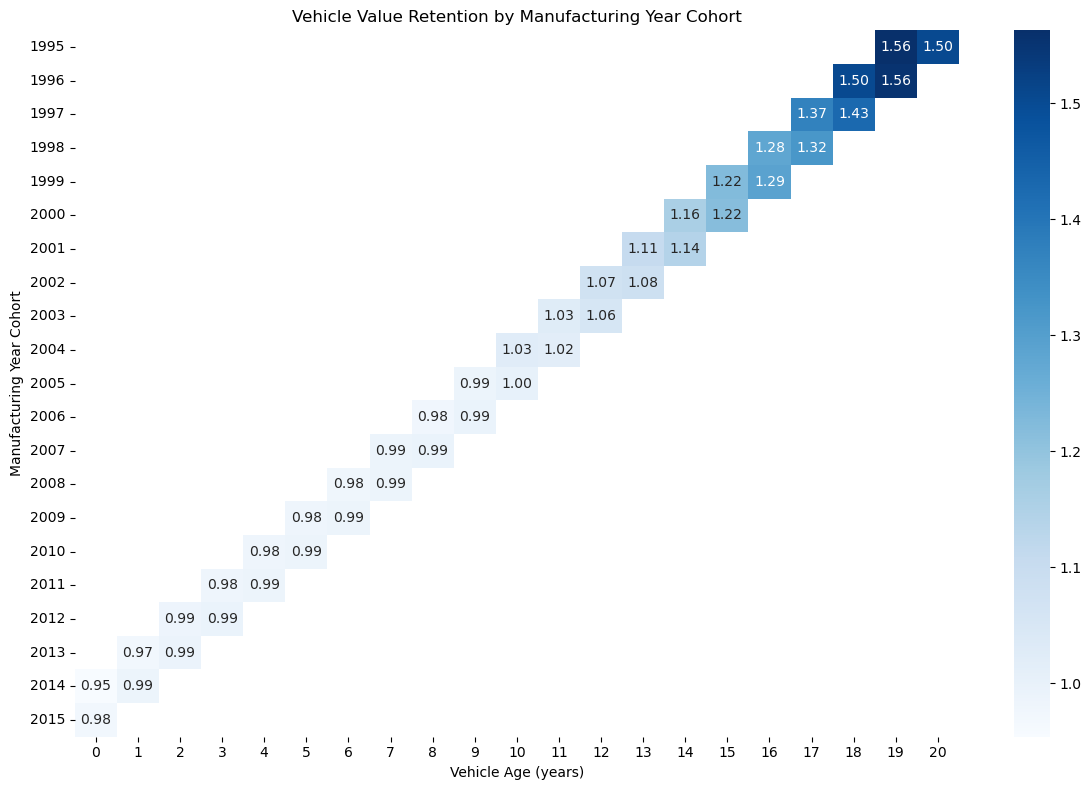

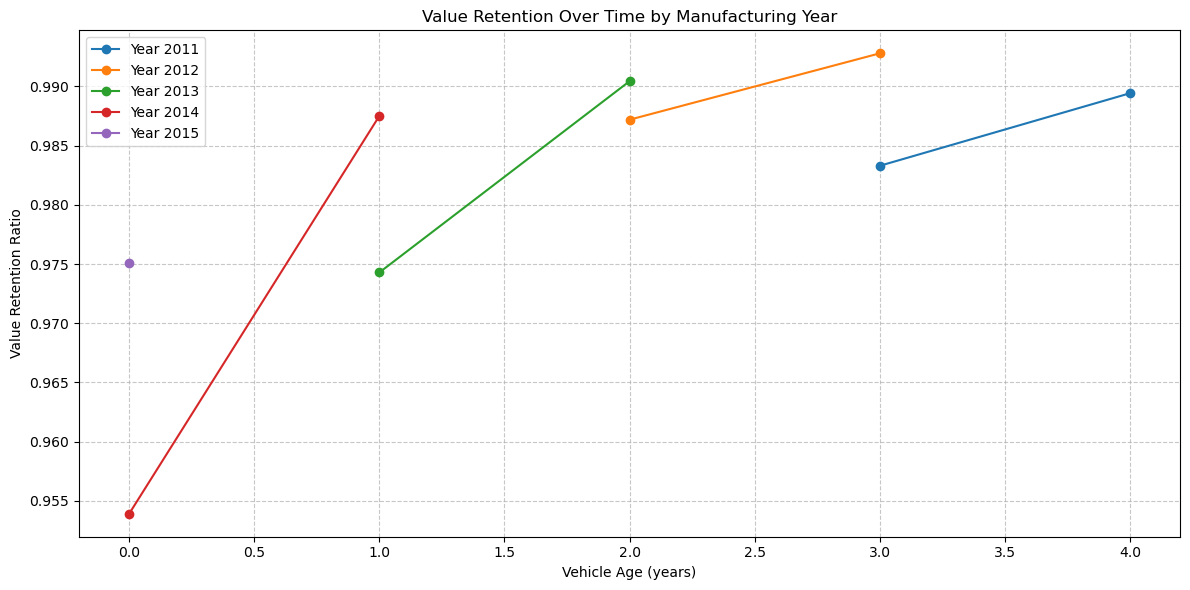

In [9]:
# Step 4: Visualization
# Step 4: Visualize the retention patterns
print("\nStep 4: Visualizing Retention Patterns")

# filter to include only cohorts and ages with sufficient data
# just setting a minimum threshold of 100 samples per cohort
valid_cohorts = count_pivot.index[count_pivot.sum(axis=1) >= 100]
# minimum of 100 samples per age bracket
valid_ages = count_pivot.columns[count_pivot.sum() >= 100]

# filter the pivot table
filtered_pivot = cohort_pivot.loc[valid_cohorts, valid_ages]

# create a heatmap to visualize retention patterns
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_pivot, annot=True, fmt='.2f', cmap='Blues')
plt.title('Vehicle Value Retention by Manufacturing Year Cohort')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Manufacturing Year Cohort')
plt.tight_layout()
plt.show()

# create a line chart to compare retention curves by year
plt.figure(figsize=(12, 6))
for year in sorted(filtered_pivot.index)[-5:]:  # Select the 5 most recent years
    if year in filtered_pivot.index:
        plt.plot(filtered_pivot.columns, filtered_pivot.loc[year], marker='o', label=f'Year {year}')

plt.title('Value Retention Over Time by Manufacturing Year')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Value Retention Ratio')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Step 5: Interpretation and Insights
Average value retention ratio by vehicle age:
Age 0 years: 0.96
Age 1 years: 0.98
Age 2 years: 0.99
Age 3 years: 0.99
Age 4 years: 0.99
Age 5 years: 0.99
Age 6 years: 0.98
Age 7 years: 0.99
Age 8 years: 0.98
Age 9 years: 0.99
Age 10 years: 1.01
Age 11 years: 1.02
Age 12 years: 1.06
Age 13 years: 1.10
Age 14 years: 1.15
Age 15 years: 1.22
Age 16 years: 1.29
Age 17 years: 1.35
Age 18 years: 1.47
Age 19 years: 1.56
Age 20 years: 1.50

Manufacturing years ranked by average value retention:
Year 1995: 1.53
Year 1996: 1.53
Year 1997: 1.40
Year 1998: 1.30
Year 1999: 1.26

Average value retention by brand:


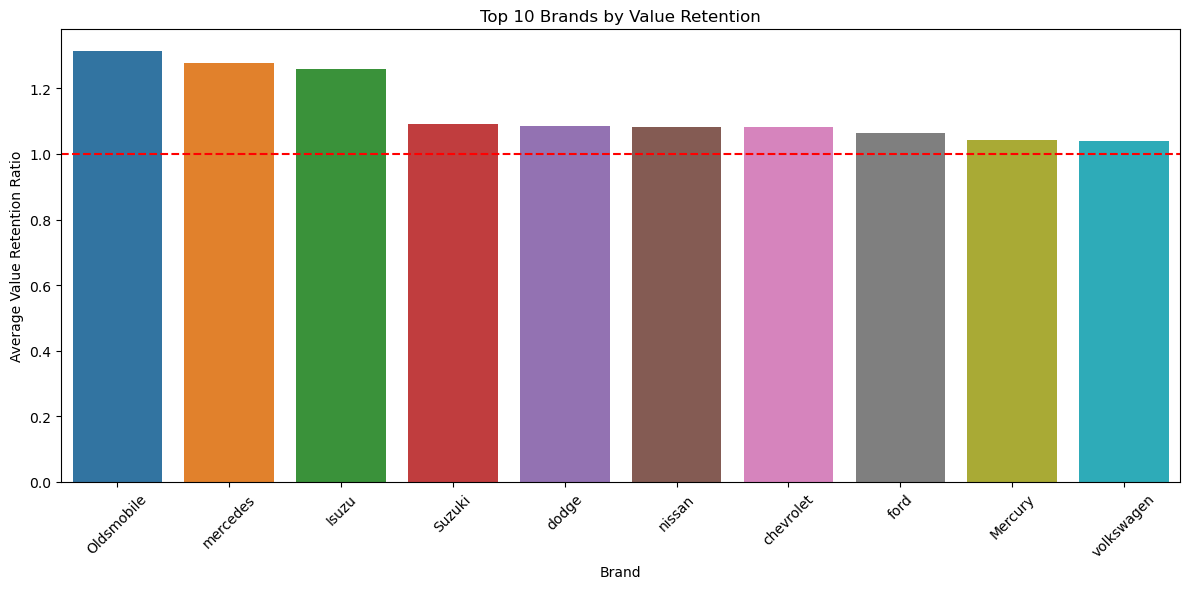

In [10]:
# Step 5: Interpretation
# Step 5: Interpret the results
print("\nStep 5: Interpretation and Insights")

# Calculate average retention ratios by vehicle age
avg_retention = filtered_pivot.mean(axis=0)
print("Average value retention ratio by vehicle age:")
for age, retention in avg_retention.items():
    print(f"Age {age} years: {retention:.2f}")

# Identify manufacturing years with the best value retention
best_years = filtered_pivot.mean(axis=1).sort_values(ascending=False)
print("\nManufacturing years ranked by average value retention:")
for year, retention in best_years.head(5).items():
    print(f"Year {year}: {retention:.2f}")

# Additional analysis: Value retention by brand
print("\nAverage value retention by brand:")
brand_retention = df.groupby('brand')['value_retention_ratio'].agg(['mean', 'count'])
brand_retention = brand_retention[brand_retention['count'] >= 20].sort_values('mean', ascending=False)

# Visualize the top brands by value retention
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_retention.index[:10], y=brand_retention['mean'][:10])
plt.title('Top 10 Brands by Value Retention')
plt.xlabel('Brand')
plt.ylabel('Average Value Retention Ratio')
plt.xticks(rotation=45)
plt.axhline(y=1.0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

# Analyze value retention by market category if available
if 'market_category' in df.columns:
    category_retention = df.groupby('market_category')['value_retention_ratio'].agg(['mean', 'count'])
    category_retention = category_retention[category_retention['count'] >= 20].sort_values('mean', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=category_retention.index, y=category_retention['mean'])
    plt.title('Average Value Retention by Market Category')
    plt.xlabel('Market Category')
    plt.ylabel('Average Value Retention Ratio')
    plt.xticks(rotation=45)
    plt.axhline(y=1.0, color='red', linestyle='--')
    plt.tight_layout()
    plt.show()